# Análise de Dados referente às vendas de Abril à Julho de 2018.
Análise de Segmentos

- Idade;
- Localidade;
- Escolaridade;
- Gênero;

Comportamento dos Segmentos.
 Receita total por tempo gerada nas vendas de cada cluster.


## Importando libs e criando o Dataframe.

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import numpy as np
import seaborn as sns 
import matplotlib.patches as mptchs

df = pd.read_csv('./customer_vendas.csv', delimiter=';',encoding='utf8')
df.head

<bound method NDFrame.head of      Número de registros  Age            City  Customer Id        Date  \
0                      1   25       São Paulo           18  09/05/2018   
1                      1   28     Mato Grosso            4  12/04/2018   
2                      1   37  Rio de Janeiro           39  02/05/2018   
3                      1   43       São Paulo           14  07/07/2018   
4                      1   30  Rio de Janeiro            2  16/04/2018   
..                   ...  ...             ...          ...         ...   
492                    1   43       São Paulo           14  12/04/2018   
493                    1   37       São Paulo           24  06/06/2018   
494                    1   42       São Paulo           12  17/04/2018   
495                    1   34       São Paulo           13  11/06/2018   
496                    1   20       São Paulo           19  08/07/2018   

     Id (Operations)  Id      Scholarship Sex    Value  
0                  1  18

Verificando e corrigindo os tipos de dados do Dataframe para a análise.

In [ ]:
df.dtypes

Número de registros     int64
Age                     int64
City                   object
Customer Id             int64
Date                   object
Id (Operations)         int64
Id                      int64
Scholarship            object
Sex                    object
Value                  object
dtype: object

In [ ]:
df["Value"] = pd.to_numeric(df.Value.str.replace(",","."))
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)


# 1. Análise de Segmentação
# Indicadores de segmentação dos clientes:

> 1.   Idade
> 2.   Estado
> 3.   Escolaridade
> 4.   Gênero
> 5.   Classificação de Consumo (Curva ABC)



## 1.1 Segmentos dos Clientes

In [ ]:
# Desconsiderar reincidência do customer_id para não duplicar dados.
# Realizar subplot dos 4 segmentos
customer_profile = df[['Customer Id','Age','City','Scholarship','Sex']].drop_duplicates()

conditionlist = [
    (customer_profile['Age'] >= 40) ,
    (customer_profile['Age'] >= 31) & (customer_profile['Age'] <40),
    (customer_profile['Age'] >= 20) & (customer_profile['Age'] <=30),
    (customer_profile['Age'] < 20)]
     
choicelist = ['40+', '31-39', '21-29', '<20']
     
customer_profile['Age Range'] = np.select(conditionlist, choicelist, default='Não especificado')



customer_profile.head()

,Customer Id,Age,City,Scholarship,Sex,Age Range
0,18,25,São Paulo,Ensino Superior,F,21-29
1,4,28,Mato Grosso,Ensino Superior,M,21-29
2,39,37,Rio de Janeiro,Ensino Médio,M,31-39
3,14,43,São Paulo,Ensino Médio,F,40+
4,2,30,Rio de Janeiro,Ensino Superior,M,21-29


In [ ]:
customer_age_range = customer_profile[['Customer Id','Age Range']]
df = pd.merge(df, customer_age_range, on='Customer Id')


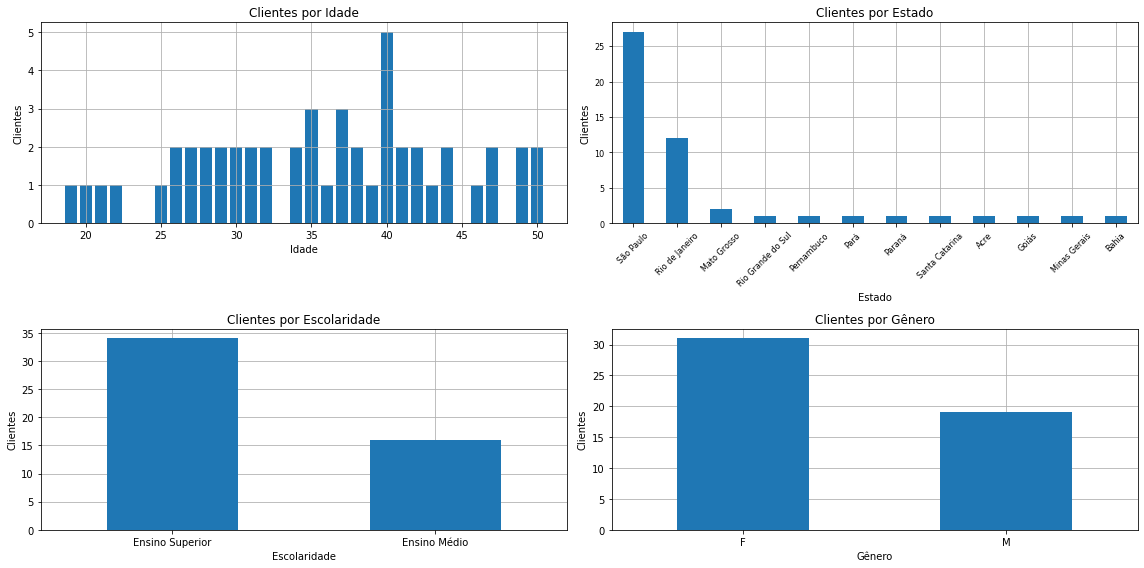

In [ ]:
customer_age = customer_profile['Age'].value_counts().rename_axis('Age').reset_index(name='Frequency')
df_age = customer_age.sort_values(by='Age')

# Clientes por Idade
df_age = customer_age.sort_values(by='Age')
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.bar(x= df_age['Age'], height=df_age['Frequency'])
plt.title("Clientes por Idade")
plt.ylabel('Clientes')
plt.xlabel('Idade')
plt.rcParams['axes.axisbelow'] = True
plt.grid(True);


# Clientes por Estado
plt.subplot(2,2,2)
customer_profile.City.value_counts().plot(kind='bar', figsize=(16,8))
plt.tick_params(labelsize=8)
plt.xticks(rotation=45)
plt.title("Clientes por Estado")
plt.ylabel('Clientes')
plt.xlabel('Estado')
plt.rcParams['axes.axisbelow'] = True
plt.grid(True);


# Clientes por Escolaridade
plt.subplot(2,2,3)
customer_profile.Scholarship.value_counts().plot(kind='bar', figsize=(16,8))
plt.xticks(rotation=0)
plt.title("Clientes por Escolaridade")
plt.ylabel('Clientes')
plt.xlabel('Escolaridade')
plt.rcParams['axes.axisbelow'] = True
plt.grid(True);


# Clientes por Gênero
plt.subplot(2,2,4)
customer_profile.Sex.value_counts().plot(kind='bar', figsize=(16,8))
plt.xticks(rotation=0)
plt.title("Clientes por Gênero")
plt.ylabel('Clientes')
plt.xlabel('Gênero')
plt.rcParams['axes.axisbelow'] = True
plt.grid(True);


plt.tight_layout()


# 2. Relação entre os Segmentos

## 2.1. Curva de Receita do Período

  Curva geral da Receita.

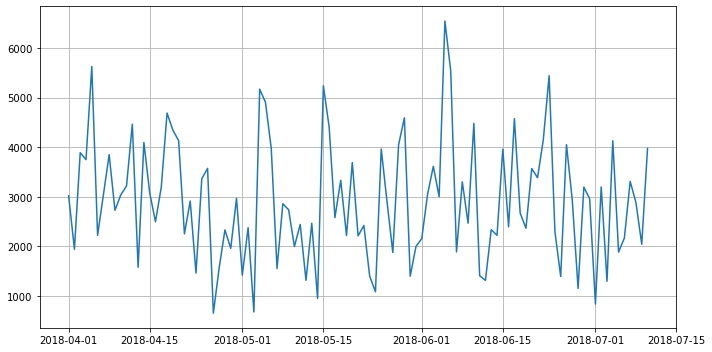

In [ ]:
sales_per_date = df.groupby('Date')['Value'].sum().reset_index(name='Value')
plt.figure(figsize=(10,5))
plt.plot(sales_per_date['Date'],sales_per_date['Value'])
plt.tight_layout()
plt.rcParams['axes.axisbelow'] = True
plt.grid(True)

## 2.2. Receita de cada Estado por Tempo.
Curva da Receita em cada localidade durante o período analisado.

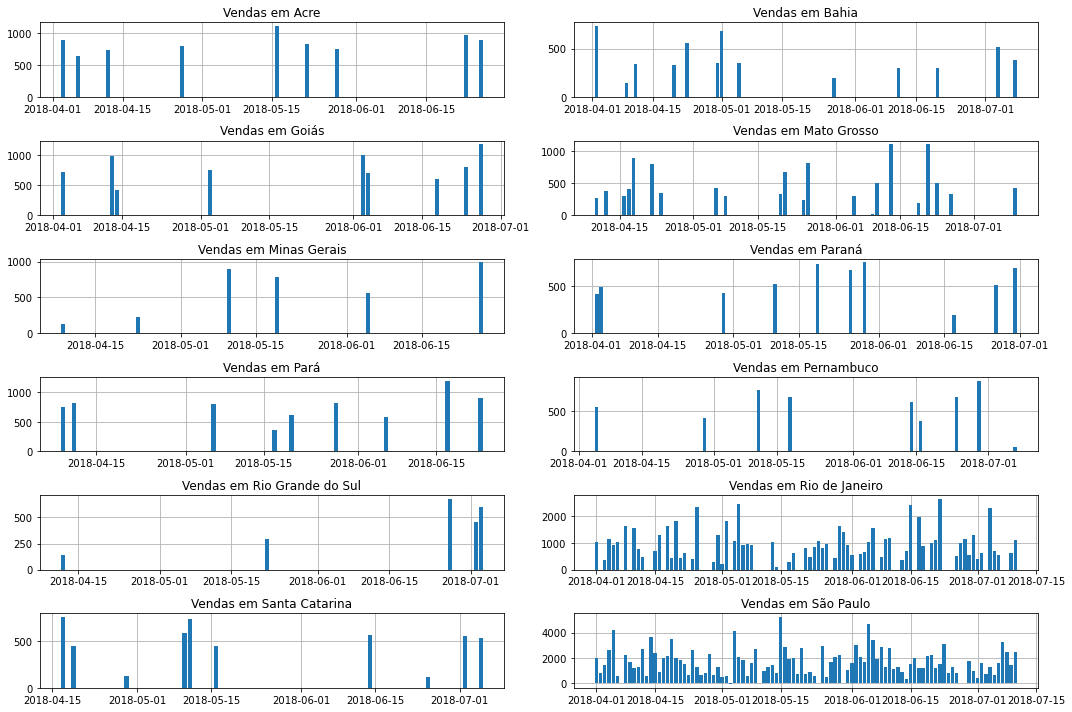

In [ ]:
sales_per_city = df.groupby(['City','Date'])['Value'].sum().reset_index(name='Value')
cities = pd.unique(sales_per_city['City'])

fig = plt.figure(figsize=(15,10))
i = 1

for x in cities:
  plt.subplot(6,2,i)

  city_data = sales_per_city['City'] == x
  filtered_df = sales_per_city[city_data]
  plt.bar(x=filtered_df['Date'],height=filtered_df['Value'])
  plt.title('Vendas em '+ x)
  plt.rcParams['axes.axisbelow'] = True
  plt.grid(True);
  i = i + 1

plt.tight_layout()

## 2.3. Receita por Escolaridade do Cliente

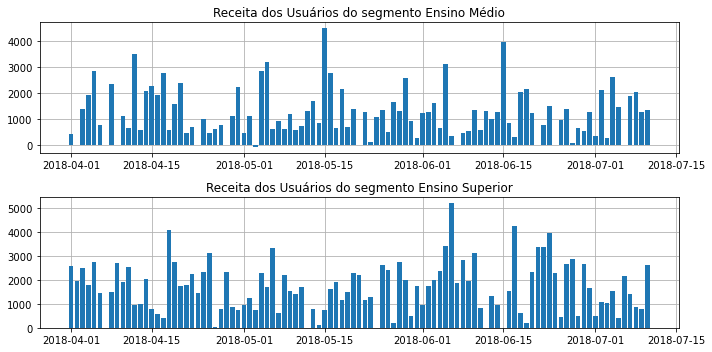

In [ ]:
sales_per_scholarship = df.groupby(['Scholarship','Date'])['Value'].sum().reset_index(name='Value')
scholarship = sales_per_scholarship['Scholarship'].unique()

fig = plt.figure(figsize=(10,5))
index = 1

for x in scholarship:
  plt.subplot(2,1,index)

  scholarship_data = sales_per_scholarship['Scholarship'] == x
  filtered_df = sales_per_scholarship[scholarship_data]
  plt.bar(x=filtered_df['Date'],height=filtered_df['Value'])
  plt.title('Receita dos Usuários do segmento '+ x)
  plt.rcParams['axes.axisbelow'] = True
  plt.grid(True);
  index = index + 1

plt.tight_layout()

## 2.4 - Receita por Gênero

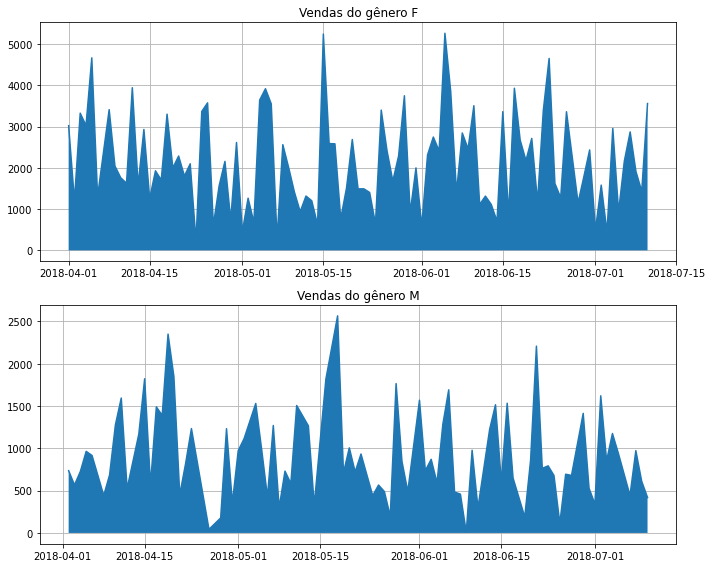

In [ ]:
sales_per_gender = df.groupby(['Sex','Date'])['Value'].sum().reset_index(name='Value')
gender = sales_per_gender['Sex'].unique()

fig = plt.figure(figsize=(10,8))
i = 1

for x in gender:
  plt.subplot(2,1,i)

  gender_data = sales_per_gender['Sex'] == x
  filtered_df = sales_per_gender[gender_data]
  plt.plot(filtered_df['Date'],filtered_df['Value'])
  plt.fill_between(filtered_df['Date'],filtered_df['Value'])
  plt.title('Vendas do gênero '+ x)
  plt.rcParams['axes.axisbelow'] = True
  plt.grid(True)
  i = i + 1

plt.tight_layout()

## 2.5 - Receita em Vendas por Faixa Etária

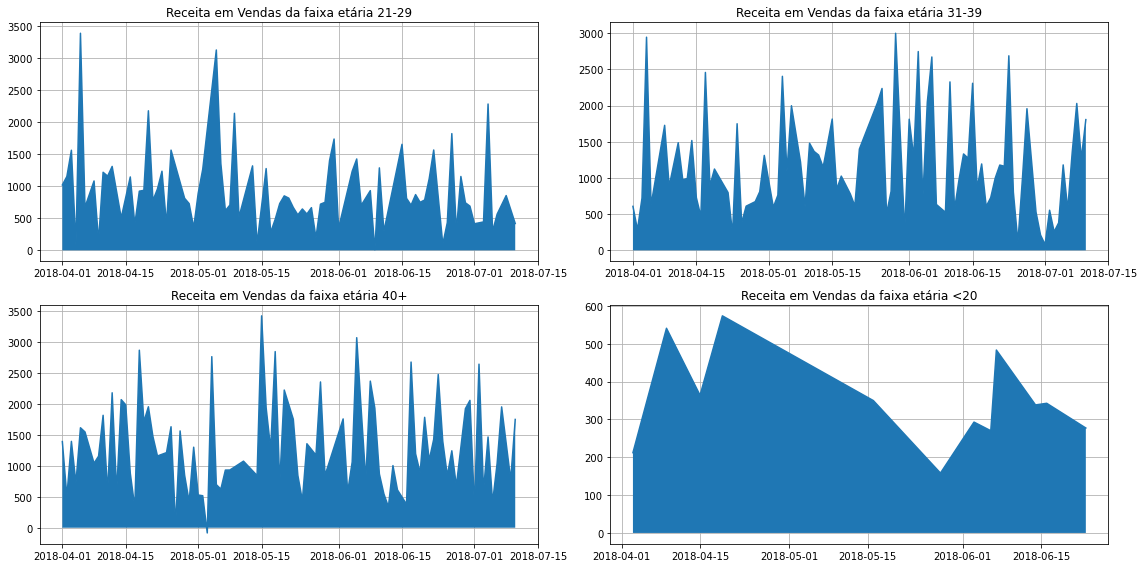

In [ ]:
sales_per_age_range = df.groupby(['Age Range','Date'])['Value'].sum().reset_index(name='Value')
age_rg = sales_per_age_range['Age Range'].unique()

fig = plt.figure(figsize=(16,8))
i = 1

for x in age_rg:
  plt.subplot(2,2,i)

  age_data = sales_per_age_range['Age Range'] == x
  filtered_df = sales_per_age_range[age_data]
  plt.plot(filtered_df['Date'],filtered_df['Value'])
  plt.fill_between(filtered_df['Date'],filtered_df['Value'])
  plt.title('Receita em Vendas da faixa etária '+ x)
  plt.rcParams['axes.axisbelow'] = True
  plt.grid(True)
  i = i + 1

plt.tight_layout()